# JetRail Time Series Forecasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline
import warnings

In [2]:
# Reading data 

train=pd.read_csv("Train_SU63ISt.csv") 
test=pd.read_csv("Test_0qrQsBZ.csv")

In [3]:
# Making copy of the train and test data

train_original=train.copy() 
test_original=test.copy()


In [4]:
train.columns,test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [5]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null object
Count       18288 non-null int64
dtypes: int64(2), object(1)
memory usage: 428.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
ID          5112 non-null int64
Datetime    5112 non-null object
dtypes: int64(1), object(1)
memory usage: 80.0+ KB


(None, None)

In [6]:
train.shape,test.shape

((18288, 3), (5112, 2))

In [7]:
# Changing the dtye to datetime to extract features from dataset

train['Datetime'] = pd.to_datetime(train.Datetime,format = '%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime,format = '%d-%m-%Y %H:%M')

train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format = '%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format = '%d-%m-%Y %H:%M')


In [8]:
# Extraction of day,month,year and hour from dataset

for i in (train,test,train_original,test_original):
    i['day'] = i.Datetime.dt.day
    i['month'] = i.Datetime.dt.month
    i['year'] = i.Datetime.dt.year
    i['hour'] = i.Datetime.dt.hour
    

In [9]:
# Seperate the days of week for weekend data

train['day of week'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [10]:
# Sepration of weekends

def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

temp2 = train['Datetime'].apply(applyer)
train['weekend'] = temp2
        
        
        

C:\Users\pRoJyot\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


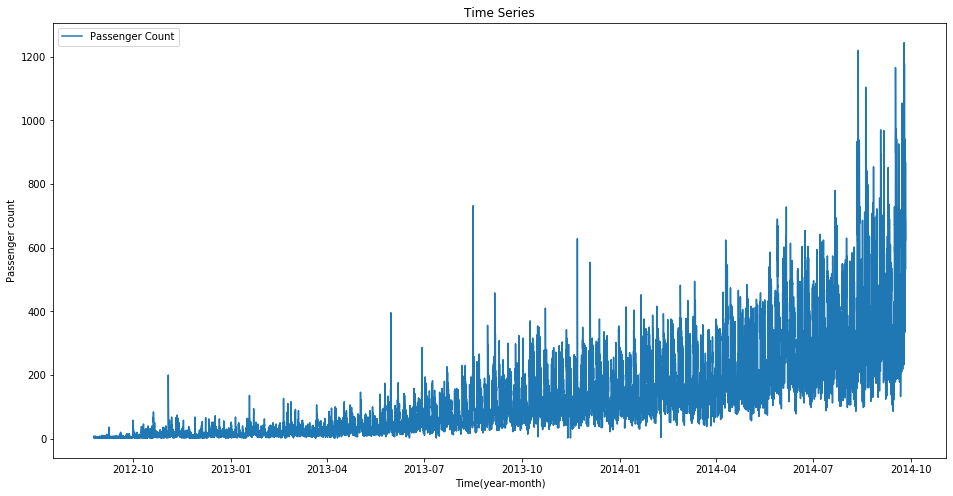

In [11]:
# Time-Series graph

train.index = train['Datetime']
df = train.drop('ID',axis=1)
ts = df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc='best')

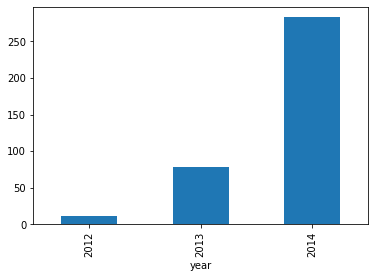

In [12]:
# Hypothesis 

# 1. Increase in traffic with upcomming years

train.groupby('year')['Count'].mean().plot.bar()

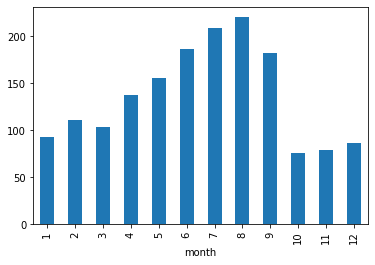

In [13]:
# 2. increase in traffic from May to October

train.groupby('month')['Count'].mean().plot.bar()


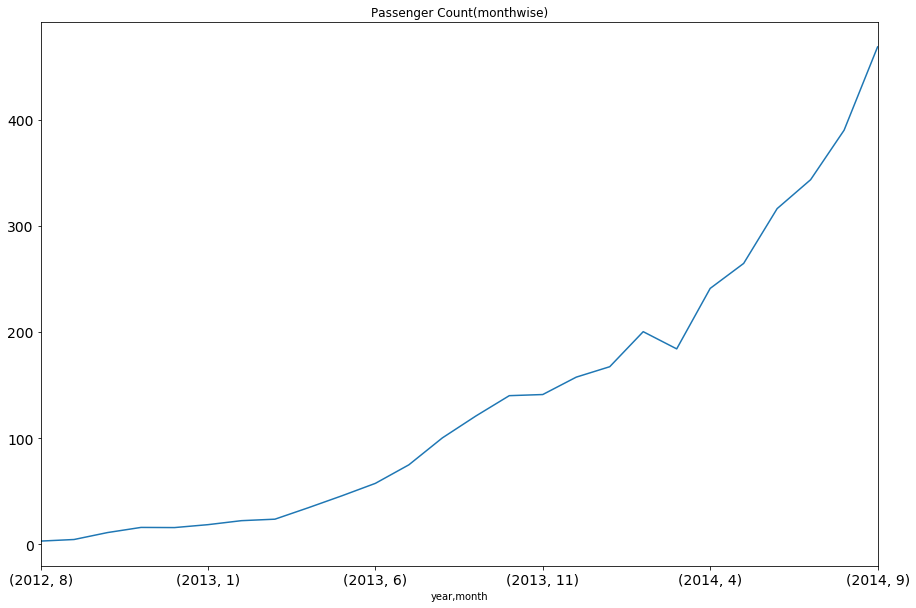

In [14]:
temp = train.groupby(['year', 'month'])['Count'].mean()

temp.plot(figsize=(15,10), title="Passenger Count(monthwise)",fontsize=14)

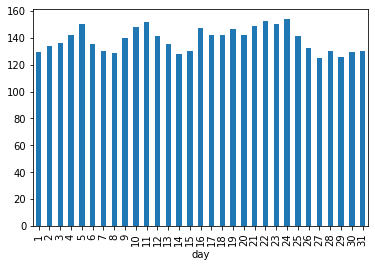

In [15]:
# Daily mean of passenger count

train.groupby('day')['Count'].mean().plot.bar()

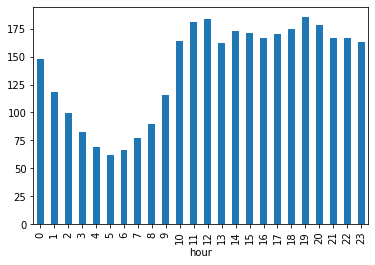

In [16]:
# Traffic during specific hours of the day

train.groupby('hour')['Count'].mean().plot.bar()

In [17]:
# Train Test Split 
# last 3 months as Test data

Train = train.loc['2012-08-25':'2014-06-24'] 
valid = train.loc['2014-06-24' : '2014-09-24']

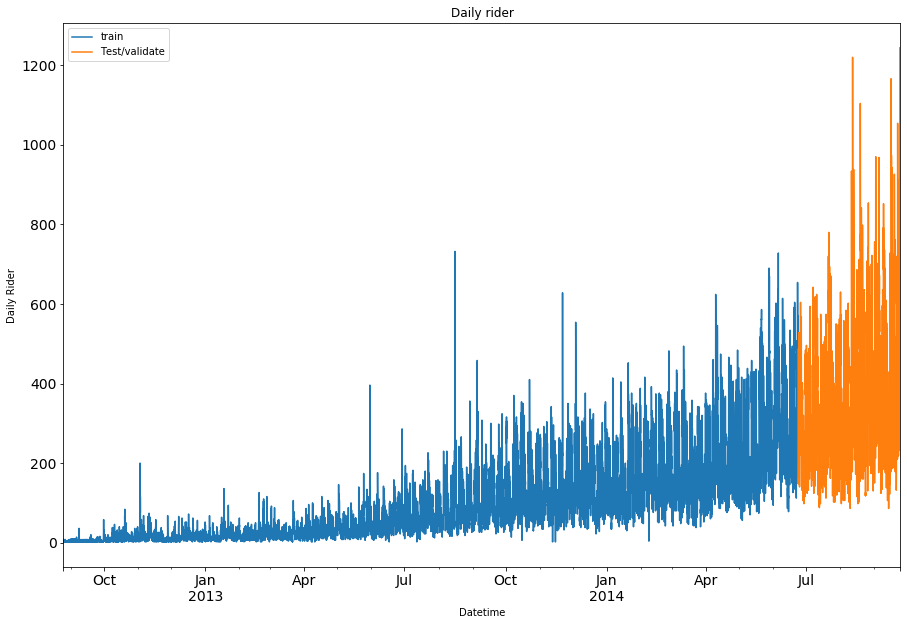

In [18]:
# Plotting the train and test split

Train.Count.plot(figsize=(15,10), title = "Daily rider", fontsize=14, label='train')
valid.Count.plot(figsize=(15,10), title = "Daily rider", fontsize=14, label= 'Test/validate')

plt.xlabel("Datetime")
plt.ylabel("Daily Rider")
plt.legend(loc='best')
plt.show()

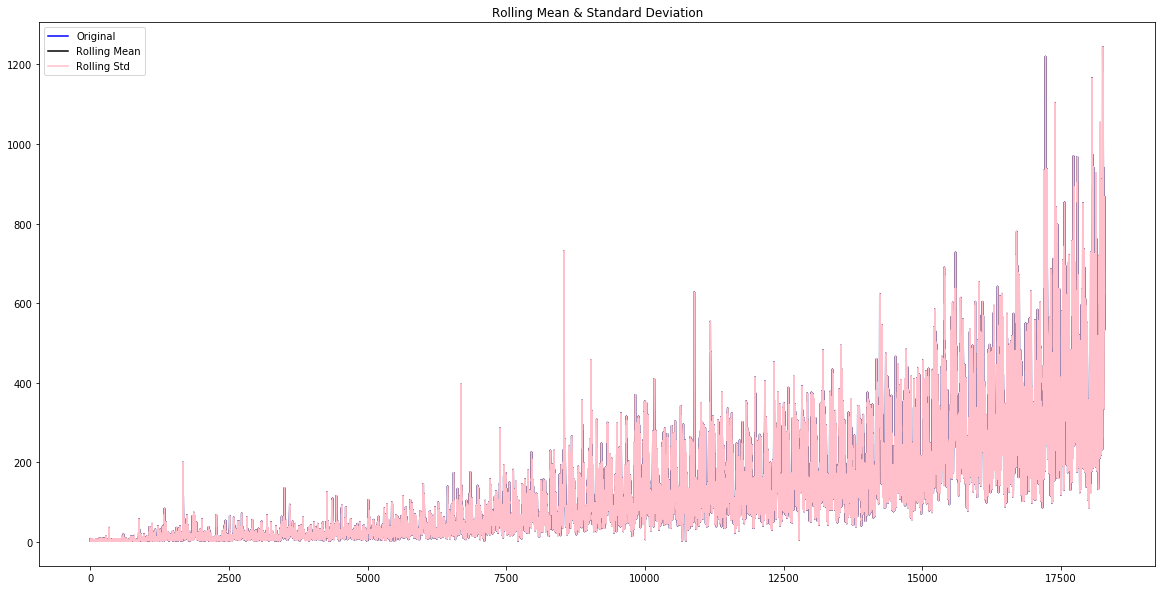

Results of Dickey-Fuller Test 

Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [19]:
## Dicky-Fuller Test

from statsmodels.tsa.stattools import adfuller

def test_stationary(timeseries):
    
    # Detemining rolling stats
    
    rolmean = timeseries.rolling(24).mean() # 24 hours each day
    rolstd = timeseries.rolling(24).std()
    
    # Plot rolling stats
    
    orig = plt.plot(timeseries, color = 'blue', label='Original')
    mean = plt.plot(timeseries, color= 'black', label='Rolling Mean')
    std = plt.plot(timeseries, color= 'pink', label='Rolling Std')
    
    plt.legend(loc='best')
    plt.title("Rolling Mean & Standard Deviation")    
    
    plt.show()
    
    
    # Perform Dickey-Fuller Test
    
    print('Results of Dickey-Fuller Test \n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    
    
    for key, value in dftest[4].items():
        
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
    
test_stationary(train_original['Count'])
    

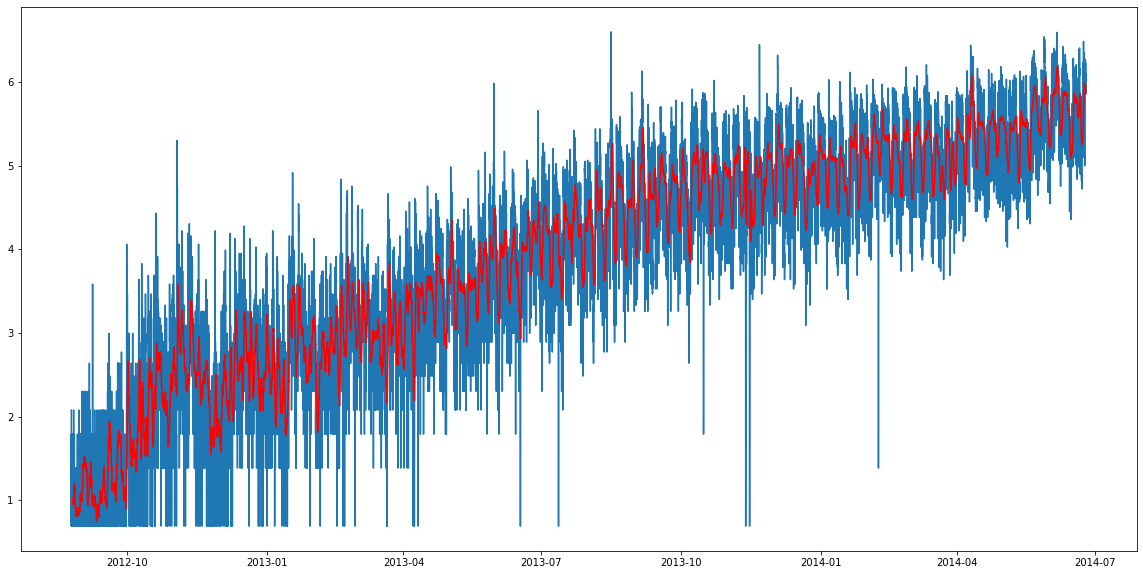

In [32]:
# Removing the Trend

Train_log = np.log(Train['Count'])
valid_log = np.log(valid['Count'])

moving_avg = Train_log.rolling(24).mean()
plt.plot(Train_log)

plt.plot(moving_avg, color = 'red')
plt.show()

In [21]:
train_log_moving_avg_diff = Train_log - moving_avg

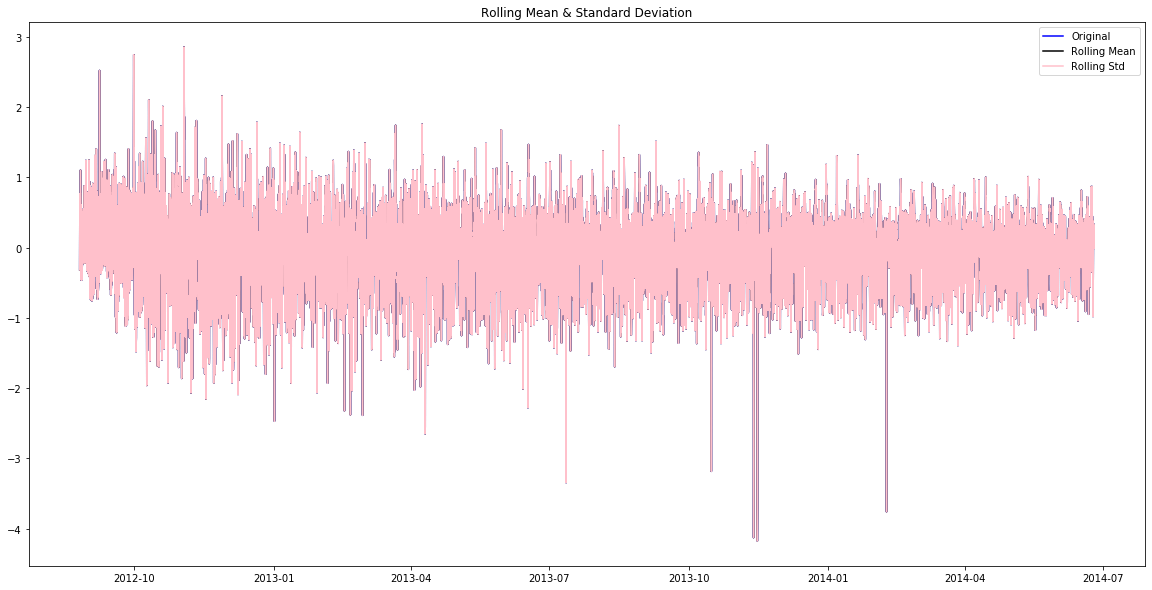

Results of Dickey-Fuller Test 

Test Statistic                   -22.470949
p-value                            0.000000
#Lags Used                        43.000000
Number of Observations Used    15989.000000
Critical Value (1%)               -3.430759
Critical Value (5%)               -2.861721
Critical Value (10%)              -2.566866
dtype: float64


In [22]:
train_log_moving_avg_diff.dropna(inplace = True)
test_stationary(train_log_moving_avg_diff)

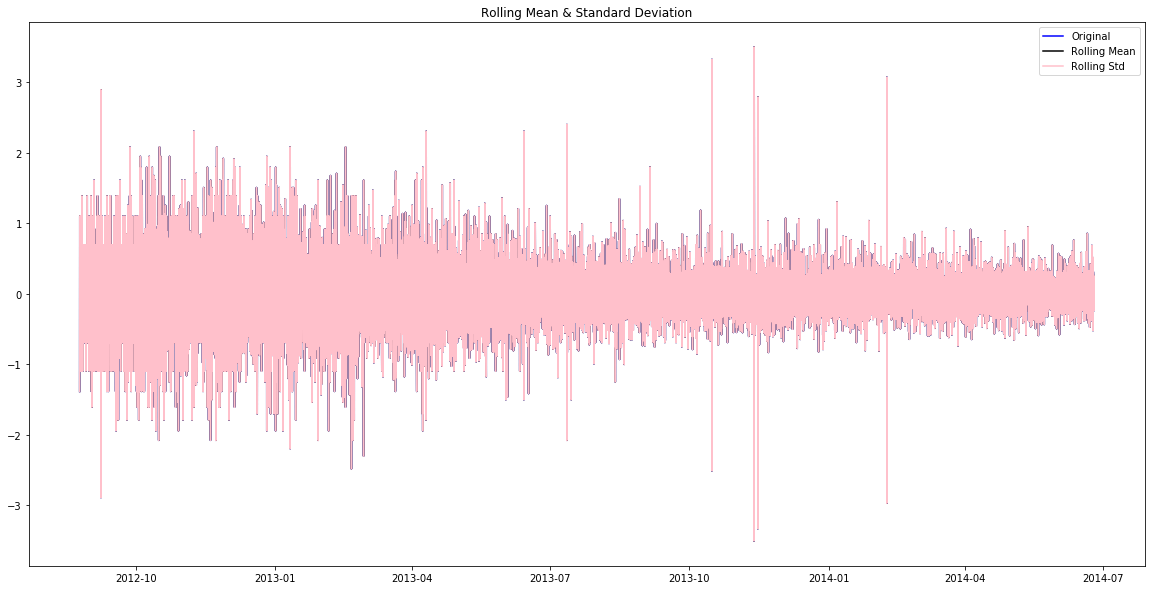

Results of Dickey-Fuller Test 

Test Statistic                   -28.579381
p-value                            0.000000
#Lags Used                        43.000000
Number of Observations Used    16011.000000
Critical Value (1%)               -3.430758
Critical Value (5%)               -2.861721
Critical Value (10%)              -2.566866
dtype: float64


In [23]:
# Stabilizing the mean of the time series

train_log_diff = Train_log - Train_log.shift(1)
test_stationary(train_log_diff.dropna())

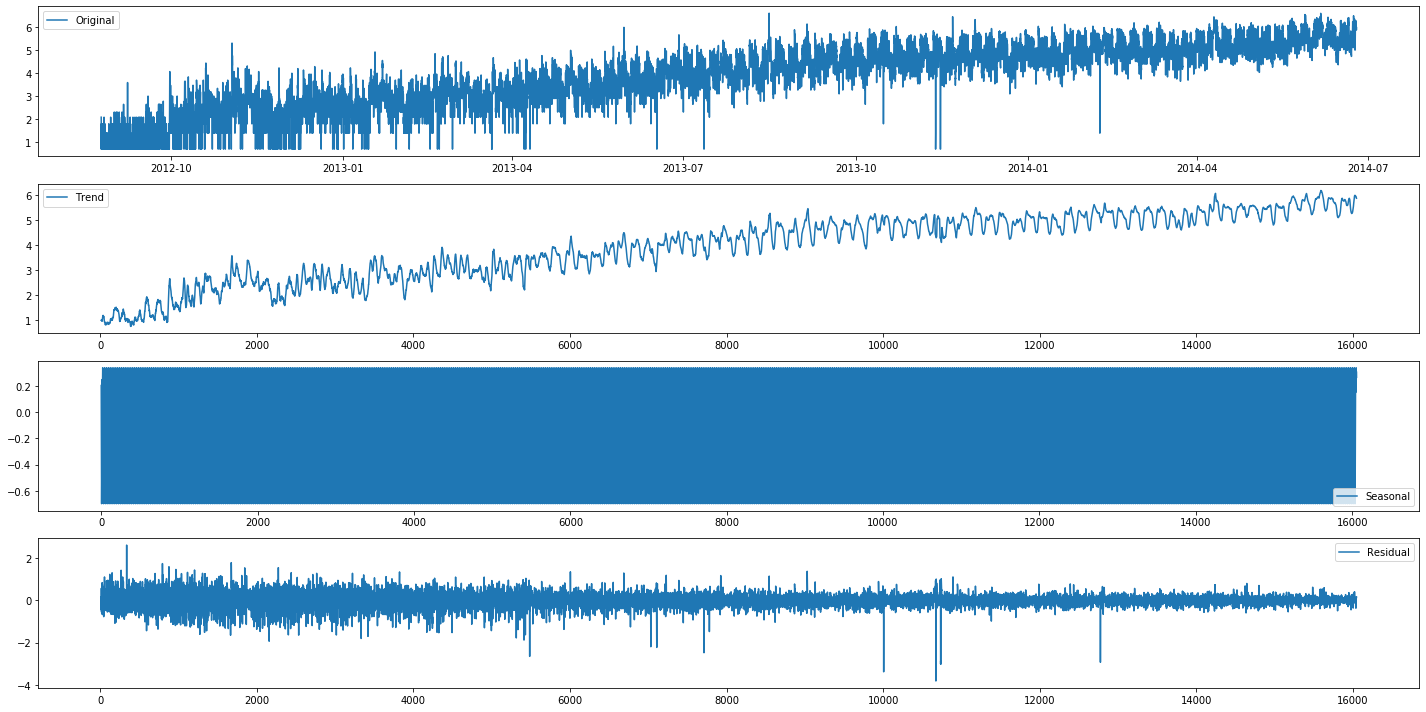

In [24]:
# Remove Seasonality

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq=24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Train_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal' )
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residual' )
plt.legend(loc='best')

plt.tight_layout()
plt.show()

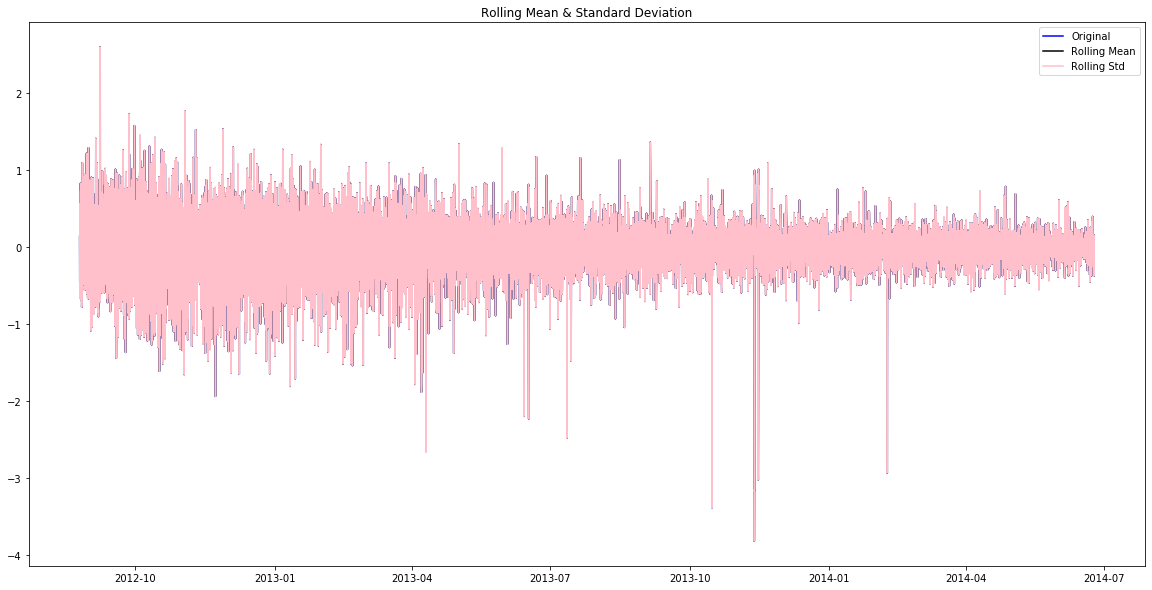

Results of Dickey-Fuller Test 

Test Statistic                   -31.326116
p-value                            0.000000
#Lags Used                        43.000000
Number of Observations Used    15988.000000
Critical Value (1%)               -3.430759
Critical Value (5%)               -2.861721
Critical Value (10%)              -2.566866
dtype: float64


In [25]:
# Checking Stationarity of Residuals

train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace=True)
train_log_decompose.dropna(inplace=True)

test_stationary(train_log_decompose[0])


# Forecasting using ARIMA

In [26]:
# Using ACF(Auto Correlation) and PACF(Partial AutoCorrelation Function)

from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(train_log_diff.dropna(), nlags = 25)
lag_pacf = pacf(train_log_diff.dropna(), nlags= 25, method = 'ols')



C:\Users\pRoJyot\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


# ACF and PACF plot

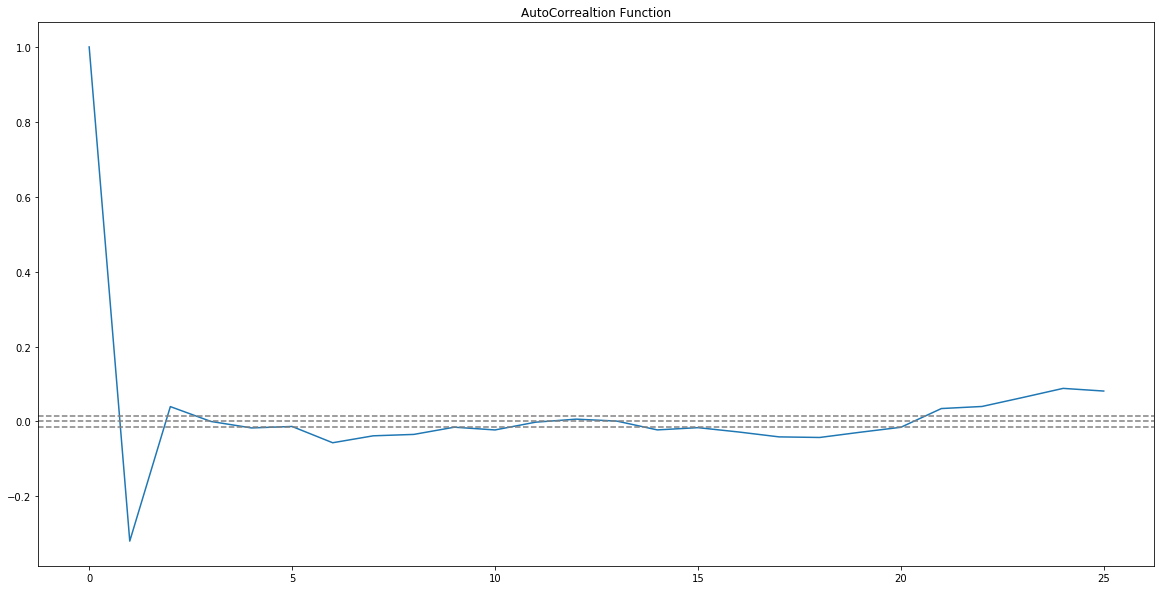

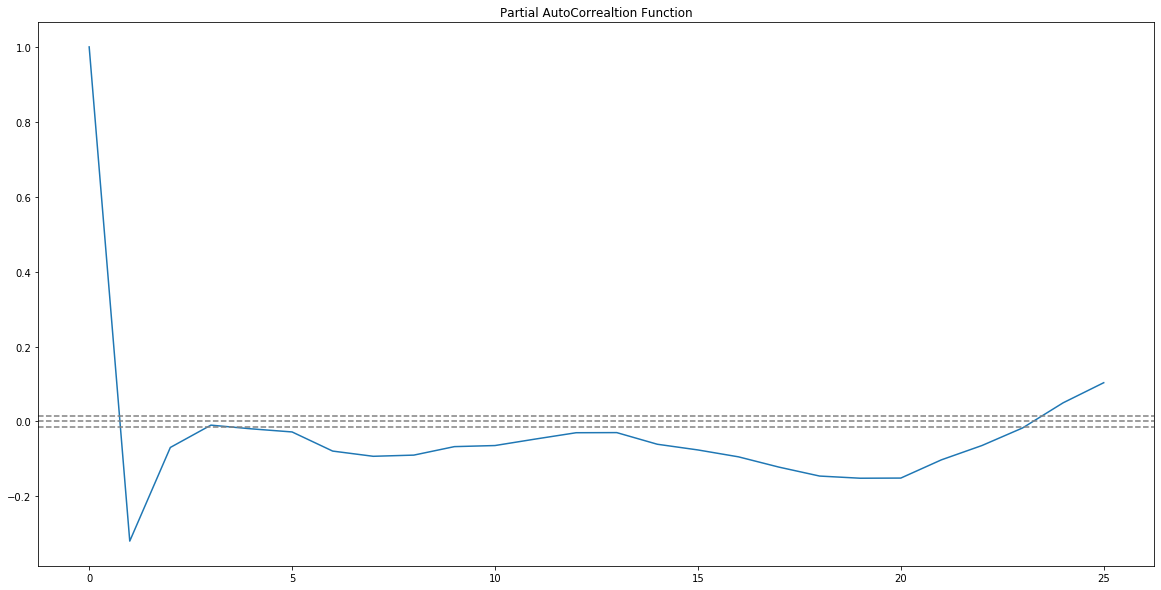

In [27]:
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())), linestyle='--', color='gray')
plt.title('AutoCorrealtion Function')
plt.show()

plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())), linestyle='--', color='gray')
plt.title('Partial AutoCorrealtion Function')
plt.show()

C:\Users\pRoJyot\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\pRoJyot\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


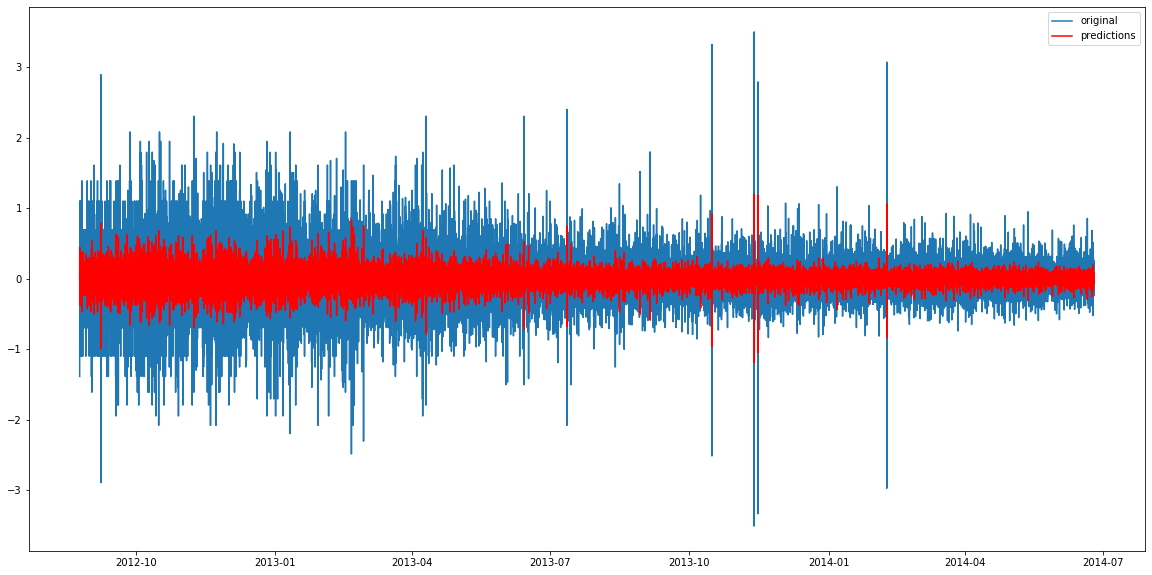

In [28]:
# Creating AR and MA models

# AR

from statsmodels.tsa.arima_model import ARIMA


model = ARIMA(Train_log, order = (2,1,0)) # here q value is zero

model
results_AR = model.fit(disp = -1)
plt.plot(train_log_diff.dropna(), label='original') 
plt.plot(results_AR.fittedvalues, color='red', label = 'predictions')
plt.legend(loc='best')
plt.show()

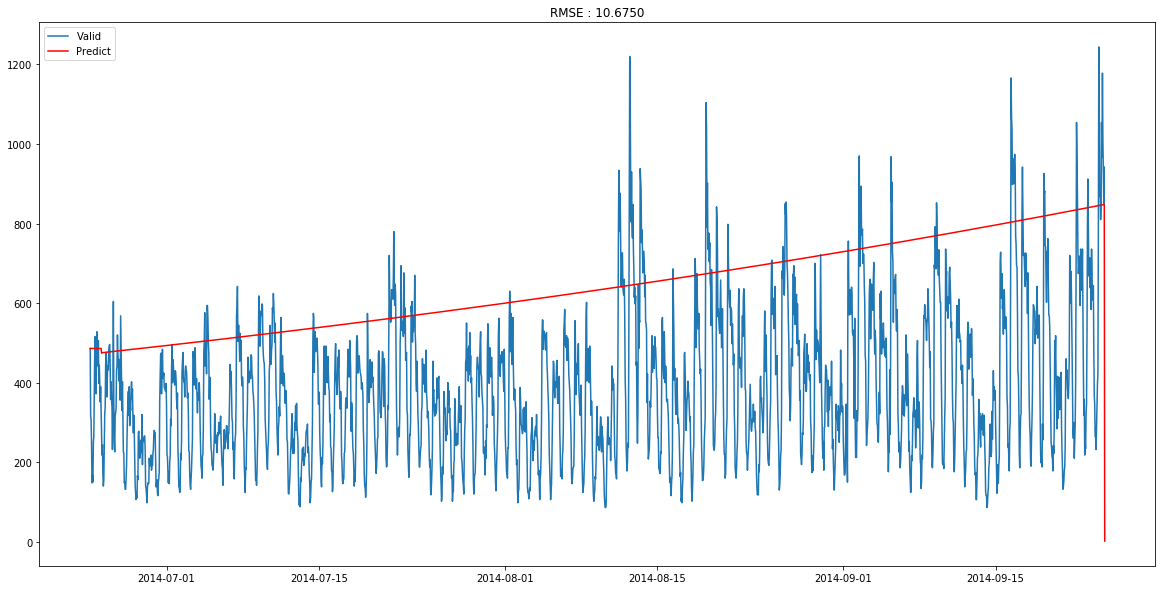

In [56]:
# Validation Curve for AR model

AR_predict = results_AR.predict(start= "2014-06-25" , end = "2014-09-25")
AR_predict = AR_predict.cumsum().shift().fillna(0)

AR_predict1 = pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index)
AR_predict1 = AR_predict1.add(AR_predict, fill_value = 0)
AR_predict = np.exp(AR_predict1)

plt.plot(valid['Count'], label = "Valid")
plt.plot(AR_predict, color = 'red', label = 'Predict')
plt.legend(loc = 'best')
# To equal the AR_predict and valid size -- Removing the last values 

AR_predict.drop(labels = [np.datetime64('2014-09-25')], inplace = True) 

plt.title('RMSE : %.4f'%(np.sqrt(np.dot(AR_predict, valid['Count']))/valid.shape[0]))
plt.show()



C:\Users\pRoJyot\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\pRoJyot\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


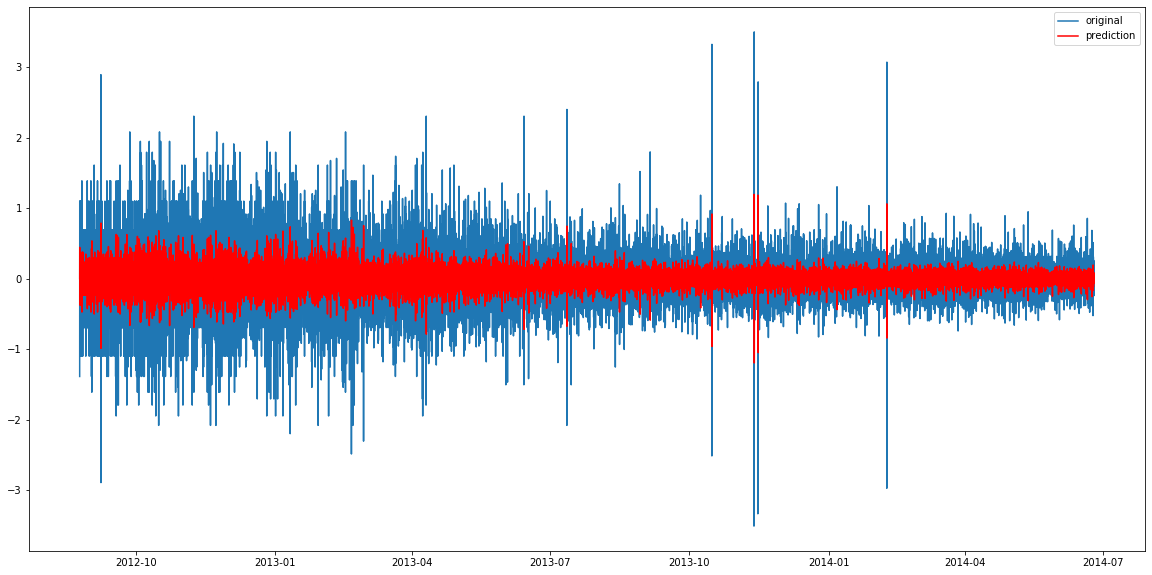

In [57]:
## MA Model

model = ARIMA(Train_log, order=(2,1,0))

model

results_MA = model.fit(disp = -1)
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_MA.fittedvalues, color='red', label='prediction')
plt.legend(loc='best')
plt.show()

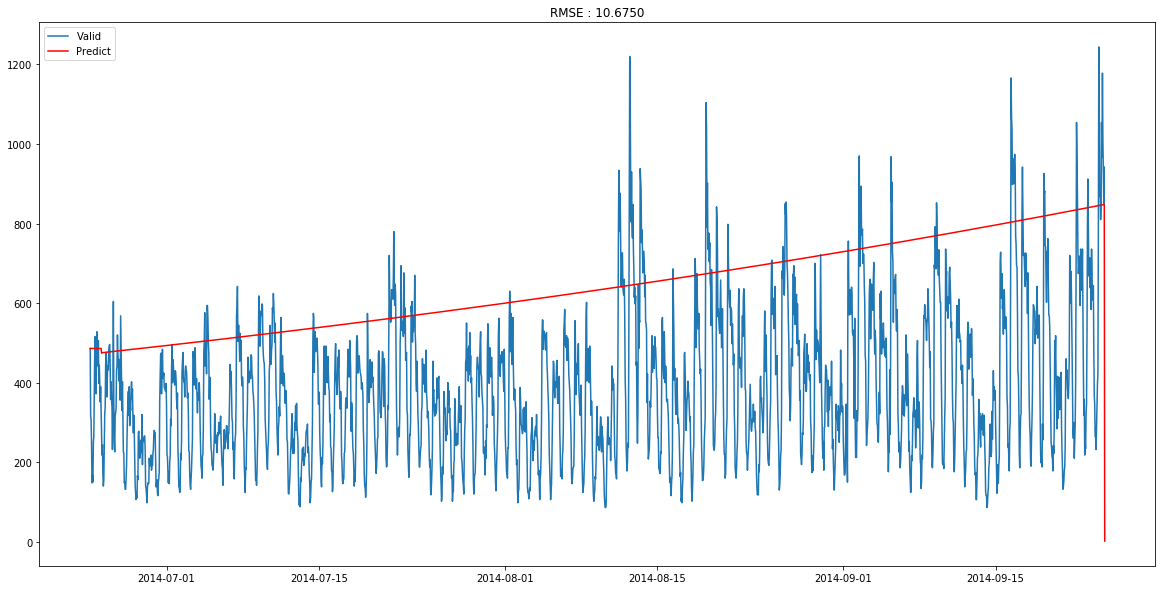

In [58]:
# Validation Curve for MA model

MA_predict = results_MA.predict(start= "2014-06-25" , end = "2014-09-25")
MA_predict = MA_predict.cumsum().shift().fillna(0)

MA_predict1 = pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index)
MA_predict1 = MA_predict1.add(MA_predict, fill_value = 0)
MA_predict = np.exp(MA_predict1)

plt.plot(valid['Count'], label = "Valid")
plt.plot(MA_predict, color = 'red', label = 'Predict')
plt.legend(loc = 'best')
# To equal the MA_predict and valid size -- Removing the last values 

MA_predict.drop(labels = [np.datetime64('2014-09-25')], inplace = True) 

plt.title('RMSE : %.4f'%(np.sqrt(np.dot(MA_predict, valid['Count']))/valid.shape[0]))
plt.show()


C:\Users\pRoJyot\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\pRoJyot\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


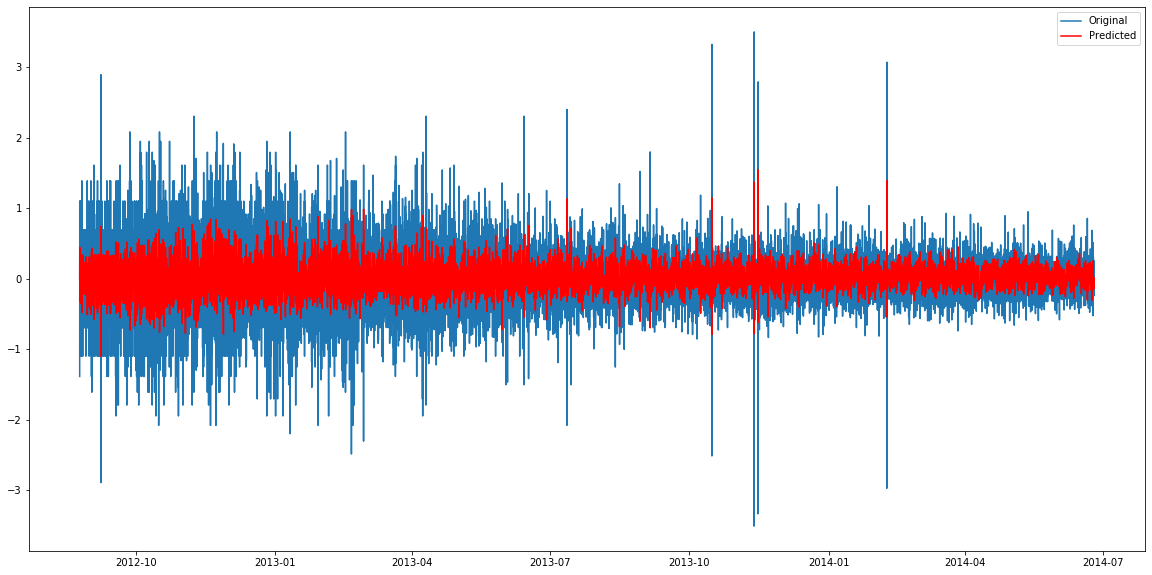

In [59]:
#Combined ARIMA Model

model = ARIMA(Train_log, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)

plt.plot(train_log_diff.dropna(), label='Original')
plt.plot(results_ARIMA.fittedvalues, color='red', label = 'Predicted')
plt.legend(loc='best')
plt.show()

In [60]:
# Changing Scale of the model
# Cheking Prediction Difference

def check_prediction_diff(predict_diff, given_set):
    
    predict_diff = predict_diff.cumsum().shift(),fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count']), index = given_set.index)
    
    predict_log = predict_base(predict_diff, fill_value = 0)
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = 'Given Set')
    plt.plot(predict, color = 'red', label = 'Predict')
    plt.legend(loc = 'best')
    plt.title('RMSE: %.4f'%(np.sqrt(np.dot(predict, given_set['Count'])) / given_set.shape[0]))
    
    plt.show()

def check_prediction_diff(predict_log, given_set):
    
    
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = 'Given Set')
    plt.plot(predict, color = 'red', label = 'Predict')
    plt.legend(loc = 'best')
    plt.title('RMSE: %.4f'%(np.sqrt(np.dot(predict, given_set['Count'])) / given_set.shape[0]))
    
    plt.show()
    

    

ValueError: shapes (2209,) and (2232,) not aligned: 2209 (dim 0) != 2232 (dim 0)

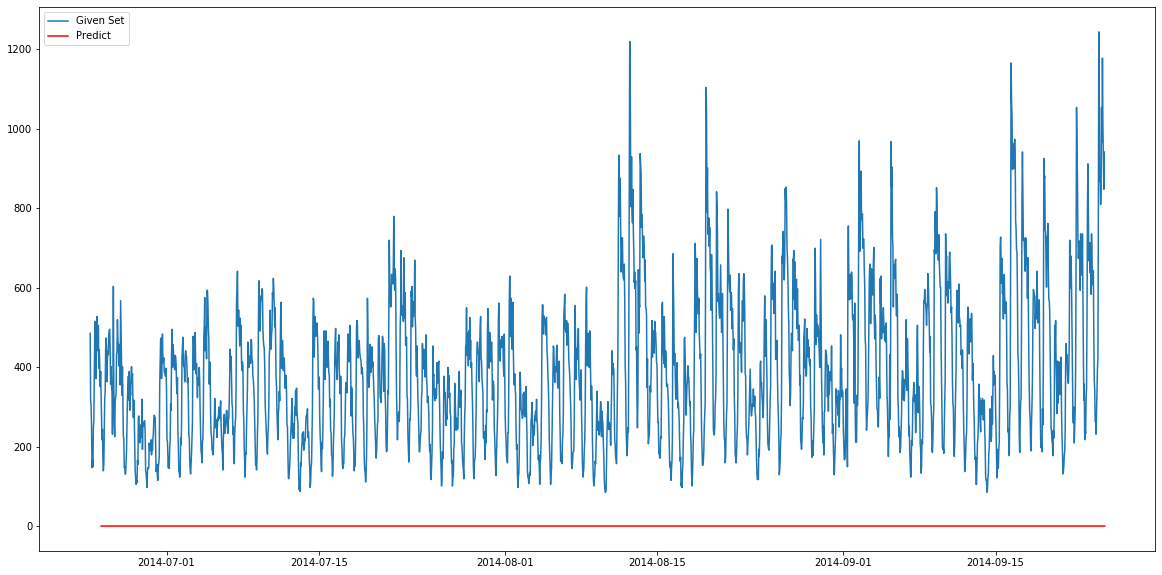

In [62]:
# Prediction of values in Validation Set

ARIMA_predict_diff = results_ARIMA.predict(start = '2014-06-25', end = '2014-09-25')
check_prediction_diff(ARIMA_predict_diff, valid)